# Zadanie 1 - MLP Clasificator
### Vypracoval: Andrej Petričko, Oleksandr Lytvyn
Zadanie úlohy:

TODO TODO TODO

## Importy

In [1]:
import numpy as np
import pandas as pd

import torch
import tensorflow as tf

import wandb
import matplotlib.pyplot as plt
import seaborn as sn

from collections import Counter

## WandB inicializácia

In [2]:
# TODO

## Načítanie datasetu


In [3]:
train = pd.read_csv("./data/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv("./data/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Analýza datasetu

In [5]:
z_train = Counter(train['label'])
z_train

Counter({1: 4684,
         0: 4132,
         4: 4072,
         7: 4401,
         3: 4351,
         5: 3795,
         8: 4063,
         9: 4188,
         2: 4177,
         6: 4137})

/Users/MacBook/Documents/python/nsiete_zadanie1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

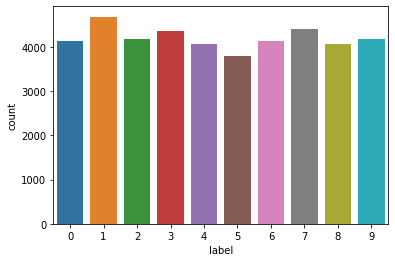

In [6]:
sn.countplot(train['label'])

In [7]:
x_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
x_test = test.values.astype('float32')

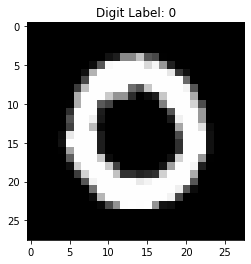

In [8]:
plt.imshow(x_train[1].reshape((28,28)),interpolation='nearest', cmap=plt.cm.gray)
plt.title("Digit Label: %d" % y_train[1])
plt.show()

In [9]:
print("Max pixel value: ",np.max(x_train[0]))
print("Min pixel value: ",np.min(x_train[0]))

Max pixel value:  255.0
Min pixel value:  0.0


## Predspracovanie dát

Hodnoty pixelom sú na intervale 0 až 255 a preto bude vhodné ich normalizovať na hodnoty z intervalu 0 až 1.

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0
print("Max pixel normalized value: ",np.max(x_train[0]))
print("Min pixel normalized value: ",np.min(x_train[0]))



Max pixel normalized value:  1.0
Min pixel normalized value:  0.0
